<a href="https://colab.research.google.com/github/yogee2406/Breast-cancer-ML_Yogeeta.ipynb/blob/main/yogeeta_capstone1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

It's always wonderful to see services customized to your needs.Businesses try to understand your behavior and adjust their offerings, so as to ensure you feel attached to their services.
- **InsaidTelecom**, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.
- Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

![image.png](attachment:image.png)

In this assignment, you are going to **study the demographics** of a **user (gender and age)** based on their app download and usage behaviors.
The Data is collected from mobile apps that use InsaidTelecom services. Full recognition and consent from individual user of those apps have been obtained,
and appropriate anonymization have been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data was obtained.


### Problem Statement

- Insaidians are expected to **build a dashboard** to understand user's **demographic characteristics** based on their:
  - mobile usage
  - geolocation, and
  - mobile device properties.
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

- To help the customer the consultants are expected to have depth of clarity in the underlying data.
**How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data.
How detailed is the observation stated in the submission report and finally how well a group presents their consulting journey.**

- Please remember this is an analytics consulting hence, your efforts in terms of finding user behavior is going to directly impact the company's offerings.
- Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.

**events_data**
- when a user uses mobile on INSAID Telecom network, the event gets logged in this data.
- Each event has an event id, location (lat/long), and the event corresponds to frequency of mobile usage.
- timestamp: when the user is using the mobile.

**gender_age_train**
- Devices and their respective user gender, age and age_group

**phone_brand_device_model**
- device ids, brand, and models phone_brand: note that few brands are in Chinese

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Events_data

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/events_data.csv.zip')
raw_data.head()

In [ ]:
raw_data.tail()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
raw_data['state'].nunique()

In [ ]:
raw_data.shape

In [ ]:
raw_data.info()

In [ ]:
raw_data.isna().sum()

In [ ]:
raw_data['event_id'].nunique()

In [ ]:
raw_data['device_id'].nunique()

In [ ]:
raw_data['city'].nunique()

In [ ]:
# City
fig, ax = plt.subplots(figsize = (16,8))

sns.barplot(x =raw_data['city'].value_counts().keys()[:50], y=raw_data['city'].value_counts()[:50])
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('City')
plt.show()

In [ ]:
raw_data['state'].nunique()

In [ ]:
# State
fig, ax = plt.subplots(figsize = (16,8))

sns.barplot(x =raw_data['state'].value_counts().keys(), y=raw_data['state'].value_counts())
plt.xlabel('State Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('State')
plt.show()

#### Observations:
1. Events data set shape is **3252950** Observations, and **7** Feature Columns for analysis.
2. Device_id unique, anonymized string of numbers and letters that identifies every individual smartphone or tablet in the world. Missing Values in device_id is 453
3. Timestamp datatype is Object, needs to be converted in timestamp for better analysis.
4. Longitude and Latitude can provide location of the device.
5. Longitude and Latitude is observed with 423 Missing values
6. State has 377 Missing values
7. Feature event_id shows **3252950** unique events
8. We can observe that in **3252950** events there are **60865** Unique device_id.


### Gender_age_train

In [ ]:
import mysql.connector
mydb = mysql.connector.connect(
 user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')

mycursor = mydb.cursor()

mycursor.execute("content/drive/MyDrive/gender_age_train.csv")

myresult = mycursor.fetchall()

gender_age_train.csv = pd.DataFrame(myresult, columns = ['device_id', 'gender', 'age', 'group'])

In [ ]:
gender_age_train = pd.read_csv("/content/drive/MyDrive/gender_age_train.csv")

In [ ]:
gender_age_train.head()

In [ ]:
gender_age_train.tail()

In [ ]:
gender_age_train.shape

In [ ]:
gender_age_train.info()

In [ ]:
gender_age_train.describe()

#### Observations: 
1. Shape of the gender_age_train dataset is **(74645,4)**.
2. No missing value is observed.
3. **Age** : 
    - It is observed that **MINIMUM Age is 1 and Max is 96**.
    - Avearge Users are of age 31 Years.
    - Median Age of user is 29 Years.
4. Some device_id is negative, we have remove the negative sign form the device id.

In [ ]:
gender_age_train['device_id'].nunique()

In [ ]:
gender_age_train['device_id'].plot.hist(figsize = (12, 6))

In [ ]:
abs(gender_age_train['device_id']).plot.hist(figsize = (12, 6))

In [ ]:
# Gender
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x =gender_age_train['gender'].value_counts().keys(), y=gender_age_train['gender'].value_counts())
plt.xlabel('User by Gender')
plt.ylabel('Counts')
plt.title('Gender')
plt.show()

In [ ]:
100*(gender_age_train['gender'].value_counts()/ gender_age_train.shape[0])

#### Observations:
- In the given dataset we can observe that Male users are more than Female Users.
- Service users are 64% Male and 35% are Female.

In [ ]:
# Age
fig, ax = plt.subplots(figsize = (12,6))

sns.histplot(gender_age_train['age'], color = '#FD625E', bins = 50, kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#### Observations:
- It is observed that users from 15- 96 Years.
- Users between 20-40 years are high, they are very active user of the service.
- We can also see that there are users between 1-15 and 80-96 years. 

In [ ]:
#Group
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =gender_age_train['group'].value_counts().keys(), y=gender_age_train['group'].value_counts())
plt.xlabel('Group')
plt.ylabel('Counts')
plt.title('Age Group')
plt.show()


#### Observations:
- Users between age group 23-26 & 32-38 are high and are Male Users.
- Female Users between age group 33-42 are high.

### Phone_brand_device_model

In [ ]:
#mydb2 = mysql.connector.connect(
# user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')

#mycursor = mydb.cursor()

#mycursor.execute("select * from phone_brand_device_model")

#myresult2 = mycursor.fetchall()

#phone_brand_device_model = pd.DataFrame(myresult2, columns = ['device_id', 'phone_brand', 'device_model'])

In [ ]:
phone_brand_device_model = pd.read_csv("/content/drive/MyDrive/phone_brand_device_model (1).csv")

In [ ]:
phone_brand_device_model.head()

In [ ]:
phone_brand_device_model.tail()

In [ ]:
phone_brand_device_model.shape

In [ ]:
phone_brand_device_model.info()

In [ ]:
phone_brand_device_model.describe()

In [ ]:
phone_brand_device_model['device_id'].nunique()

In [ ]:
abs(phone_brand_device_model['device_id']).plot.hist(figsize = (12, 6))

## Data Pre-Processing
#### Task:
1. Device_id in all three dataset change from negative to positive using abs().
2. Timestamp datatype convert to valid timestamp using pandas to_datetime.
3. Find the missing Null values in Device_id, latitude, longitude and State and try to fill these data.
4. Phone_brand and Device_model names change from Chinese to English.
5. Check for outlier in age and remove it.

In [ ]:
# Converting all negative device_id number to positive
raw_data['device_id'] = abs(raw_data['device_id'])
gender_age_train['device_id'] = abs(gender_age_train['device_id'])
phone_brand_device_model['device_id'] = abs(phone_brand_device_model['device_id'])

In [ ]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'])
raw_data.info()

In [ ]:
#Missing values in raw_data
raw_data.isna().sum()

In [ ]:
# Missing State
state_missing = raw_data[raw_data['state'].isna()]
state_missing

In [ ]:
# Plot for city with missing state
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = state_missing['city'].value_counts().keys(), y = state_missing['city'].value_counts(), color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('City With Missing State')
plt.show()

In [ ]:
# State
raw_data['state'] = np.where(raw_data['city'] == 'Delhi', 'Delhi', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Pune', 'Maharashtra', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Indore', 'MadhyaPradesh', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Jaipur', 'Rajasthan', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Visakhapatnam', 'AndhraPradesh', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Chennai', 'TamilNadu', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Gangarampur', 'WestBengal', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Arambagh', 'WestBengal', raw_data.state)
raw_data['state'] = np.where(raw_data['city'] == 'Channapatna', 'Karnataka', raw_data.state)

In [ ]:
raw_data.head()

In [ ]:
#device_id
device_id_null = raw_data[raw_data['device_id'].isna()]
device_id_null

In [ ]:
device_id_null['city'].unique()

In [ ]:
device_id_null[device_id_null['city'] == 'Indore']

In [ ]:
# Unique Longitudes and Latitude
device_id_null['longitude'].unique(), device_id_null['latitude'].unique()

In [ ]:
#jaipur data
jaipur = device_id_null[device_id_null['city'] == 'Jaipur']
jaipur['longitude'].unique()

In [ ]:
# Null Device id
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = device_id_null['city'].value_counts().keys(), y = device_id_null['city'].value_counts(), color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('Device ID Missing')
plt.show()

In [ ]:
#unique device id 
unique_device_id = raw_data.drop_duplicates(['device_id'])
unique_device_id

In [ ]:
unique_device_id[unique_device_id['city'] == 'Jaipur']

In [ ]:
#unique device id
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = unique_device_id['city'].value_counts().keys()[:50], y = unique_device_id['city'].value_counts()[:50], color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('Unique Device ID City')
plt.show()

In [ ]:
unique_device_id[unique_device_id['longitude']== 75.888487]

In [ ]:
unique_device_id[unique_device_id['longitude']== 75.846007]

In [ ]:
unique_device_id[unique_device_id['longitude']== 75.836167]

In [ ]:
# pune_missing_device_id 
pune = device_id_null[device_id_null['city'] == 'Pune']
pune['longitude'].unique()

In [ ]:
pune

In [ ]:
visakhapatnam = device_id_null[device_id_null['city'] == 'Visakhapatnam']
visakhapatnam['longitude'].unique(), visakhapatnam['latitude'].unique()

In [ ]:
unique_device_id[unique_device_id['longitude']==83.357991]

In [ ]:
unique_device_id[unique_device_id['longitude']==83.371738]

In [ ]:
unique_device_id[unique_device_id['longitude']== 83.342711]

In [ ]:
raw_data[raw_data['longitude'] == 73.860165]


In [ ]:
unique_device_id[unique_device_id['longitude']==73.862756]

In [ ]:
unique_device_id[unique_device_id['longitude']== 73.860165]

In [ ]:
unique_device_id[unique_device_id['longitude']== 73.926499]

In [ ]:
raw_data['device_id'] = np.where(raw_data['longitude'] == 75.888487, 9.177251e+17, raw_data.device_id).astype(float)
raw_data['device_id'] = np.where(raw_data['longitude'] == 75.846007, 8.460337e+18, raw_data.device_id).astype(float)
raw_data['device_id'] = np.where(raw_data['longitude'] == 75.836167, 3.562356e+18, raw_data.device_id).astype(float)
raw_data['device_id'] = np.where(raw_data['longitude'] == 73.862756, 9.027086e+18, raw_data.device_id).astype(float)

In [ ]:
raw_data.info()

In [ ]:
raw_data['device_id'].isna().sum()

In [ ]:
raw_data['device_id'].nunique()

In [ ]:
%matplotlib inline
# NULL Device Id Plotting
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(x = device_id_null['latitude'], y = device_id_null['longitude'])
plt.show()

In [ ]:
#Null Device_id Locations 
null_device_locations = device_id_null[['city','latitude', 'longitude']].values.tolist()
null_device_locations

In [ ]:
import folium
device_map = folium.Map(location = [22.660325, 88.388361])
fg = folium.FeatureGroup(name ='null_id_locations')

for i in null_device_locations:
    fg.add_child(folium.Marker(location = [i[1], i[2]], popup=i[0],
                              icon = folium.Icon(color = 'red')))

device_map.add_child(fg)

In [ ]:
#Device locations of the events data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = raw_data['latitude'], x= raw_data['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()

In [ ]:
#Anomaly location data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = data_anomaly['latitude'], x= data_anomaly['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()

In [ ]:
#Creating a separate data for Anomaly Locations
data_anomaly = raw_data[raw_data['longitude'] < 69.5]
data_anomaly['longitude'].unique(),data_anomaly['latitude'].unique()

In [ ]:
anomaly_locations = data_anomaly[['city','latitude', 'longitude']].values.tolist()

In [ ]:
#Anomaly Locations
anomaly_locations

In [ ]:
#Plotting Anomaly Device Locations on Map
import folium
device_map = folium.Map(location = [22.660325, 88.388361])
fg = folium.FeatureGroup(name ='anomaly_id_locations')

for i in anomaly_locations:
    fg.add_child(folium.Marker(location = [i[1], i[2]], popup=i[0],
                              icon = folium.Icon(color = 'blue')))

device_map.add_child(fg)

In [ ]:
#Phone Brand
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =phone_brand_device_model['phone_brand'].value_counts().keys()[:50], y=phone_brand_device_model['phone_brand'].value_counts()[:50])
plt.xlabel('Brand Name')
plt.ylabel('Counts')
plt.title('Phone Brands')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Phone Brand name Chinese to English
phone_brand_device_model['phone_brand'] = phone_brand_device_model['phone_brand'].replace(to_replace = ['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'],
                                                                                          value= ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei', 'Qiku', 'Meizu', 'Phixun',
       'China Mobile', 'HTC', 'Tianyu', 'Supreme treasure', 'LG', 'Oboxin', 'Youmi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer', 'InFocus', 'LeTV', 'Hisense', 'Bailifeng',
       'OnePlus', 'Yuxin', 'Haier', 'Cooby', 'Newman', 'Waveguide', 'Duowei', 'Ling Yun', 'TCL', 'Cooper', 'Aipel' ,
       'LOGO', 'Scallion', 'Guomi', 'Asus', 'Onda', 'Aiuni', 'Konka', 'Yougo', 'Banghua', 'Cyber Yuhua',
       'Black Rice', 'Lovme', 'Pioneer', 'E Pie', 'Shenzhou', 'Nokia', 'Pure', 'Candied Hulu', 'Yitong', 'Ouxin',
       'Mickey', 'Cool Doo Cube', 'Blue Devil', 'Little Poplar', 'Belfeng', 'Glutinous Rice', 'Mi Song', 'Eren Eben', 'Simi', 'Big Q' ,
       'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu', 'Qingcheng', 'Original', 'Shrimp', 'Xiaxin', 'Huang',
       'Baika', 'SUGAR', 'Okey', 'Century Star', 'Chi-Mag', 'Obi', 'Kivu', 'Femtosecond', 'Desai', 'Epai',
       'Google', 'Venus Digital', 'Guangxin', 'Noahs letter', 'MIL', 'White Rice', 'Big Cola', 'Baojixun', 'Youyu', 'Shouyun',
       'Rimi', 'Rigao', 'Wopfeng', 'Mole', 'Xianmi', 'Kellytong', 'Vip', 'Owo', 'Fengmi', 'Hengyufeng',
       'Ox', 'Siemens', 'Oraldi', 'PPTV'])

In [ ]:
#Phone Brand
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =phone_brand_device_model['phone_brand'].value_counts().keys()[:50], y=phone_brand_device_model['phone_brand'].value_counts()[:50])
plt.xlabel('Brand Name')
plt.ylabel('Counts')
plt.title('Phone Brands')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Device name Chinese
chinese_device_model = ['红米Note2','红米Note3','大神F1Plus','note顶配版','星星1号','红米note', '青春版','荣耀4A','魅蓝Note 2',
                        '荣耀7i','荣耀畅玩4C','红米2A','荣耀畅玩5','荣耀7',  '红米1S','麦芒4','荣耀6','荣耀畅玩4X','荣耀3X畅玩版','荣耀X2',
                        '魅蓝NOTE','荣耀6 Plus','荣耀+','荣耀畅玩4','黄金斗士A8','小米note','荣耀3C','小米4C','红米note增强版','天鉴W900', '荣耀畅玩5X',
                        '红米2','大神F1','魅蓝2','Mate 7 青春版','乐檬K3 Note','火星一号','乐檬K3', '联想黄金斗士S8','大神F2','魅蓝','荣耀6 plus','大神F2全高清版',
                        '灵感XL','旗舰版','坚果手机','红米', '超级手机1 Pro','畅享5','魅蓝metal','超级手机1','超级手机1s','荣耀U8860','纽扣','荣耀畅玩平板T1', '红辣椒 X1',
                        '春雷HD','ivvi 小i','荣耀畅玩4C运动版','麦芒3','小鲜2','大器2', '锋尚','大神X7','小苹果','乐玩','大神Note3','么么哒3N','锋尚Pro','红辣椒','荣耀3X',
                        '三星big foot','荣耀3C畅玩版','ivvi 小骨Pro', '红辣椒XM', '远航3', 'My 布拉格', 'metal 标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版 Galaxy', '红牛V5', 
                        '2016版 Galaxy', '锋尚2','金钢','野火S','2016版 Galaxy','红米3','小辣椒 X3','荣耀平板T1-','大神Note','7295A青春版','大Q Note','么么哒',
                        '小辣椒 M2','黄金斗士Note8','炫影S+','风华3','TALK 7X四核','2016版 Galaxy', '天鉴T1','土星一号', '麦芒3S','飞马','联想VIBE X2', '威武3', '红辣椒任性版',
                        '小辣椒 9', '大观4', '超级手机Max','星星2号','雷霆战机','威武3C', '倾城L3','Z9 mini 精英版','小辣椒S1', '小辣椒 5','T03锋至版','乐玩2C','么么哒3S','乐K31',
 '黄金斗士S8畅玩版','时尚手机',]

In [ ]:
# Device name in English
english_device_model = ['Redmi Note2', 'Redmi Note3', 'Great God F1Plus', 'note top version', 'Star 1', 'Redmi note',
                        'Youth Edition','Honor 4A','Meizu Note 2','Honor 7i','Honor Play 4C','Redmi 2A','Honor Play 5','Honor 7',
                        'Redmi 1S', 'Maimang 4', 'Honor 6', 'Honor Play 4X', 'Honor 3X Play Edition', 'Honor X2', 'Mei Lan NOTE', 'Honor 6 Plus',
                        'Honor+', 'Honor Play 4', 'Golden Fighter A8', 'Xiaomi Note', 'Honor 3C', 'Xiaomi 4C', 'Redmi Note Enhanced Edition', 'Tianjian W900',
                        'Honor Play 5X','Red Rice 2','Great God F1','Meizu 2','Mate 7 Youth Edition','Lemeng K3 Note','Mars One','Lemeng K3',
                        'Lenovo Gold Fighter S8', 'Dashen F2', 'Charm Blue', 'Honor 6 plus', 'Dashen F2 Full HD Version', 'Inspiration XL', 'Ultimate Edition', 'Nut Phone', 'Red Rice' ,
                        'Super Phone 1 Pro', 'Enjoy 5', 'Meizu Metal', 'Super Phone 1', 'Super Phone 1s', 'Honor U8860', 'Button', 'Honor Play Tablet T1',
                        'Red Pepper X1', 'Chunlei HD', 'ivvi Xiaoi', 'Honor Play 4C Sports Edition', 'Maimang 3', 'Xiaoxian 2','Big 2','Feng Shang',
                        'Great God X7','Little Apple','Have fun','Great God Note3','Momoda 3N','Fengshang Pro','Red chilli','Honor 3X','Samsung big foot','Honor 3C Play Edition','ivvi Osicles Pro',
                        'Red Pepper XM','voyage 3','My Prague','metal Standard Edition','Enjoy 5S','Red Pepper Note','Feng Shang Max','2016 Edition Galaxy','Red Bull V5','2016 Edition Galaxy','Feng Shang 2',
                        'Golden Steel','Wildfire S','2016 Edition Galaxy','Red Rice 3','Pepper X3','Honor Tablet T1-','Great God Note','7295A Youth Edition','Big Q Note','mwah','Pepper M2','Golden Warrior Note8',
                        'Hyunying S+','Fenghua 3','TALK 7X Quad Core','2016 version of Galaxy','Tianjian T1','Saturn One','Maimang 3S','Pegasus','Lenovo VIBE X2','Mighty 3','Red pepper capricious version',
                        'Pepper 9','Grand View 4','Super Phone Max','Star 2','Thunder Fighter','Mighty 3C','Allure L3','Z9 mini Elite Edition','Chili S1','Pepper 5','T03 Frontier Edition','Fun 2C','Momada 3S','Lemeng K31','Golden Fighter S8 Play Edition',
                        'Fashionable phone']

In [ ]:
# Device name Chinese to English
phone_brand_device_model['device_model'] = phone_brand_device_model['device_model'].replace(to_replace = ['红米Note2','红米Note3','大神F1Plus','note顶配版','星星1号','红米note', '青春版','荣耀4A','魅蓝Note 2',
                        '荣耀7i','荣耀畅玩4C','红米2A','荣耀畅玩5','荣耀7',  '红米1S','麦芒4','荣耀6','荣耀畅玩4X','荣耀3X畅玩版','荣耀X2',
                        '魅蓝NOTE','荣耀6 Plus','荣耀+','荣耀畅玩4','黄金斗士A8','小米note','荣耀3C','小米4C','红米note增强版','天鉴W900', '荣耀畅玩5X',
                        '红米2','大神F1','魅蓝2','Mate 7 青春版','乐檬K3 Note','火星一号','乐檬K3', '联想黄金斗士S8','大神F2','魅蓝','荣耀6 plus','大神F2全高清版',
                        '灵感XL','旗舰版','坚果手机','红米', '超级手机1 Pro','畅享5','魅蓝metal','超级手机1','超级手机1s','荣耀U8860','纽扣','荣耀畅玩平板T1', '红辣椒 X1',
                        '春雷HD','ivvi 小i','荣耀畅玩4C运动版','麦芒3','小鲜2','大器2', '锋尚','大神X7','小苹果','乐玩','大神Note3','么么哒3N','锋尚Pro','红辣椒','荣耀3X',
                        '三星big foot','荣耀3C畅玩版','ivvi 小骨Pro', '红辣椒XM', '远航3', 'My 布拉格', 'metal 标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版 Galaxy', '红牛V5', 
                        '2016版 Galaxy', '锋尚2','金钢','野火S','2016版 Galaxy','红米3','小辣椒 X3','荣耀平板T1-','大神Note','7295A青春版','大Q Note','么么哒',
                        '小辣椒 M2','黄金斗士Note8','炫影S+','风华3','TALK 7X四核','2016版 Galaxy', '天鉴T1','土星一号', '麦芒3S','飞马','联想VIBE X2', '威武3', '红辣椒任性版',
                        '小辣椒 9', '大观4', '超级手机Max','星星2号','雷霆战机','威武3C', '倾城L3','Z9 mini 精英版','小辣椒S1', '小辣椒 5','T03锋至版','乐玩2C','么么哒3S','乐K31',
 '黄金斗士S8畅玩版','时尚手机'],
                            value= ['Redmi Note2', 'Redmi Note3', 'Great God F1Plus', 'note top version', 'Star 1', 'Redmi note',
                        'Youth Edition','Honor 4A','Meizu Note 2','Honor 7i','Honor Play 4C','Redmi 2A','Honor Play 5','Honor 7',
                        'Redmi 1S', 'Maimang 4', 'Honor 6', 'Honor Play 4X', 'Honor 3X Play Edition', 'Honor X2', 'Mei Lan NOTE', 'Honor 6 Plus',
                        'Honor+', 'Honor Play 4', 'Golden Fighter A8', 'Xiaomi Note', 'Honor 3C', 'Xiaomi 4C', 'Redmi Note Enhanced Edition', 'Tianjian W900',
                        'Honor Play 5X','Red Rice 2','Great God F1','Meizu 2','Mate 7 Youth Edition','Lemeng K3 Note','Mars One','Lemeng K3',
                        'Lenovo Gold Fighter S8', 'Dashen F2', 'Charm Blue', 'Honor 6 plus', 'Dashen F2 Full HD Version', 'Inspiration XL', 'Ultimate Edition', 'Nut Phone', 'Red Rice' ,
                        'Super Phone 1 Pro', 'Enjoy 5', 'Meizu Metal', 'Super Phone 1', 'Super Phone 1s', 'Honor U8860', 'Button', 'Honor Play Tablet T1',
                        'Red Pepper X1', 'Chunlei HD', 'ivvi Xiaoi', 'Honor Play 4C Sports Edition', 'Maimang 3', 'Xiaoxian 2','Big 2','Feng Shang',
                        'Great God X7','Little Apple','Have fun','Great God Note3','Momoda 3N','Fengshang Pro','Red chilli','Honor 3X','Samsung big foot','Honor 3C Play Edition','ivvi Osicles Pro',
                        'Red Pepper XM','voyage 3','My Prague','metal Standard Edition','Enjoy 5S','Red Pepper Note','Feng Shang Max','2016 Edition Galaxy','Red Bull V5',
                        '2016 Edition Galaxy','Feng Shang 2','Golden Steel','Wildfire S','2016 Edition Galaxy','Red Rice 3','Pepper X3','Honor Tablet T1-','Great God Note','7295A Youth Edition','Big Q Note',
                        'mwah','Pepper M2','Golden Warrior Note8','Hyunying S+','Fenghua 3','TALK 7X Quad Core','2016 version of Galaxy','Tianjian T1','Saturn One','Maimang 3S','Pegasus','Lenovo VIBE X2','Mighty 3',
                        'Red pepper capricious version','Pepper 9','Grand View 4','Super Phone Max','Star 2','Thunder Fighter','Mighty 3C','Allure L3','Z9 mini Elite Edition','Chili S1','Pepper 5','T03 Frontier Edition','Fun 2C','Momada 3S',
                        'Lemeng K31','Golden Fighter S8 Play Edition','Fashionable phone'])

In [ ]:
# Device Model
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =phone_brand_device_model['device_model'].value_counts().keys()[:50], y=phone_brand_device_model['device_model'].value_counts()[:50])
plt.xlabel('Model Name')
plt.ylabel('Counts')
plt.title('Model')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
-
-
-
-

In [ ]:
events_data = raw_data[raw_data['longitude'] >69.5]

In [ ]:
events_data.head()

In [ ]:
age_data = gender_age_train
phone_data = phone_brand_device_model

In [ ]:
events_data.info(show_counts = True)

In [ ]:
events_data.isna().sum()

In [ ]:
age_data.info()

In [ ]:
phone_data.info()

In [ ]:
age_data['age'].plot.hist(figsize = 12,5)

In [ ]:
# Age
fig, ax = plt.subplots(figsize = (12,6))

sns.histplot(age_data['age'], color = '#9B0065', bins = 50, kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
# First quartile (Q1)
Q1 = np.percentile(age_data['age'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(age_data['age'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)
print(Q1)
print(Q3)

In [ ]:
events_data_impute=raw_data.filter(['event_id','device_id','longitude','latitude'],axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(events_data_impute.values)
imputed_data = imr.transform(events_data_impute.values)
print (imputed_data)

In [ ]:
events_data_filled = pd.DataFrame(data=imputed_data, columns=["event_id", "device_id","longitude","latitude"])

In [ ]:
events_data_filled.head()

In [ ]:
events_data_filled.isna().sum()

In [ ]:
events_data_filled.info()

In [ ]:
events_data_imputed=pd.merge(raw_data,events_data_filled,on=['event_id'])

In [ ]:
events_data_imputed.head()

In [ ]:
events_data_imputed.isnull().sum()

In [ ]:
events_data_imputed.drop(['device_id_x', 'longitude_x', 'latitude_x'], axis=1, inplace=True)

In [ ]:
events_data_imputed.rename(columns={'device_id_y': 'device_id', 'longitude_y': 'longitude', 'latitude_y': 'latitude'}, inplace=True)

In [ ]:
events_data_imputed.isnull().sum()

In [ ]:
#events_data_imputed.drop(['latitude_x'], axis=1, inplace=True)

In [ ]:
events_data_imputed.isnull().sum()

In [ ]:
events_data_imputed.info()

# TASK 3:
    1. Do an Analysis of the preprocessed data.


Here are the points about how Analysis should be done:


1. Distribution of Users(device_id) across States.


2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).


3. Distribution of Users across Gender.


4. Distribution of Users across Age Segments.


5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.


6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).


7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).



Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.


8. Hourly distribution of Phone Calls.


9. Plot the Users on the Map using any suitable package.

1. Distribution of Users(device_id) across States.

In [ ]:
event_unique_device_id = events_data_imputed.drop_duplicates(['device_id'])

In [ ]:
event_unique_device_id['device_id'].nunique()

In [ ]:
event_unique_device_id['device_id']

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(data=event_unique_device_id, x="state", y="device_id")
plt.xlabel('state Name')
plt.ylabel('device_id')
plt.title('device_id vs state')
plt.xticks(rotation = 90)
plt.show()

# 2.  Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = phone_data['phone_brand'].value_counts().keys()[:10], y = phone_data['phone_brand'].value_counts()[:10], color = 'r')

plt.show()

In [ ]:
top_10_phone_data = phone_data['phone_brand'].value_counts()[:10].to_frame()

In [ ]:
top_10_phone_data.info()

In [ ]:
sns.histplot(phone_data, x = "device_id", hue = "phone_brand")
plt.show()

# MERGING ALL THREE DATASETS

In [ ]:
event_gender = pd.merge(events_data, age_data, how = "inner", left_index=True, right_index=True)

In [ ]:
event_gender.info()

In [ ]:
all_one = pd.merge(event_gender, phone_data, how = "inner", left_index=True, right_index=True)

In [ ]:
all_one.info()

In [ ]:
all_one.to_csv("all_one")

In [ ]:
all_dashboard_df = all_one[['event_id', 'device_id_x', 'timestamp', 'longitude', 'latitude', 'state']]

In [ ]:
all_dashboard_df.to_csv("")

FileNotFoundError: ignored

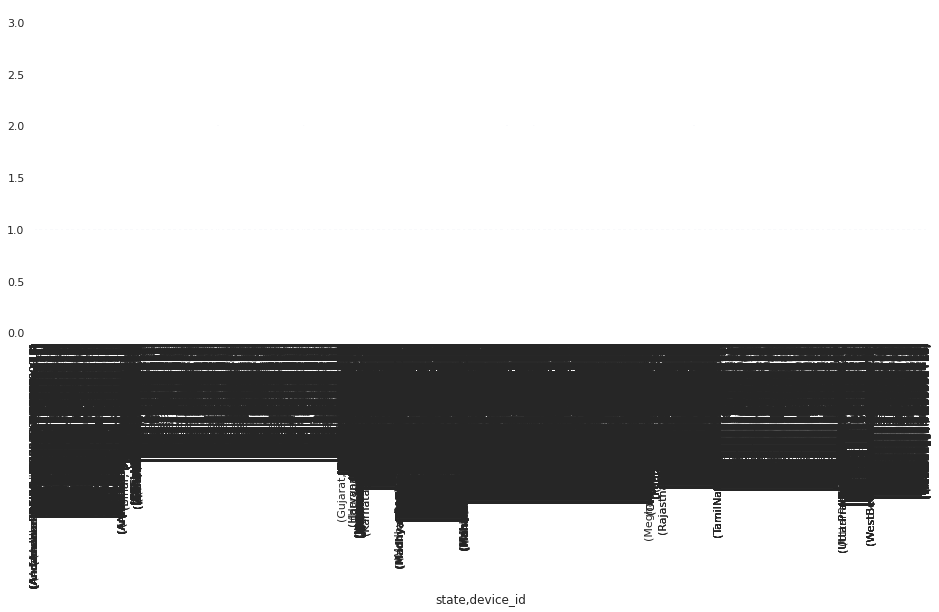

In [ ]:
all_one.groupby(['state','device_id'])['device_id'].count().plot.bar(figsize=(16,6))

In [ ]:
all_one.head()

,event_id,device_id_x,timestamp,longitude,latitude,city,state,device_id_y,gender,age,group,device_id,phone_brand,device_model
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,8076087639492063270,M,35,M32-38,1.877780e+18,vivo,Y13
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2897161552818060146,M,35,M32-38,3.766090e+18,Xiaomi,V183
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,8260683887967679142,M,35,M32-38,6.238940e+18,OPPO,R7s
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,4938849341048082022,M,30,M29-31,8.973200e+18,Samsung,A368t
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,245133531816851882,M,30,M29-31,2.015530e+18,Xiaomi,Redmi Note2


In [ ]:
all_one.drop('device_id_x', inplace=True, axis=1)

In [ ]:
all_one.drop('device_id_y', inplace=True, axis=1)

In [ ]:
all_one.head(10)

In [ ]:
df_final = all_one[['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'state']]

In [ ]:
df_final.to_csv("C:/Users/shubh/OneDrive/Desktop/DATA SCIENCE/Data Science INSAID COURSE/Capstone Project 1/myevents.csv")

In [ ]:
df_delhi_final = all_one[all_one['state']=='Delhi']
print(all_one.info())
print(df_delhi_final.info())

Outlier Detection for Latitude and Longitude:

In [ ]:
# Creating subset for plotting latitude and longitude in map
dataE_map = df_delhi_final[['latitude','longitude','city','state']]

# Counting number of duplicates of latitude and longitude
count1 = dataE_map.groupby(['latitude', 'longitude']).size() 
count = pd.DataFrame(count1)
count = count.rename(columns={0: 'DuplicateCounts'})
count.head()

In [ ]:
# Remove  duplicated values 
dataE_map = dataE_map.drop_duplicates(keep='first')
dataE_map.describe(include='all')

In [ ]:
# merging the map data with count data to get the duplicatecounts of lat & long
dataE_map = pd.merge(left=dataE_map, right=count, on=['latitude', 'longitude'],how='left')
dataE_map.head(20)

In [ ]:
# Plotting latitude & longitude values in map using Folium
import statistics as st
from scipy import stats
long_mode = st.mode(df_delhi_final[df_delhi_final.city == 'Delhi']['longitude'])
lat_mode = st.mode(df_delhi_final[df_delhi_final.city == 'Delhi']['latitude'])
map_vis = folium.Map(location=[lat_mode, long_mode], zoom_start=5, tiles='Stamen Terrain')
# Duplicates quartile is created to show different colors for different no. of duplicates
dataE_map['DuplicateCounts_quartile'] = pd.qcut(dataE_map['DuplicateCounts'], 4, labels=False)
# Color dictionary is created to distdf_mh_finalinguish the duplicates quartile (red shows more duplicates of lat & long data)
colordict = {0: 'blue', 1: 'green', 2: 'orange', 3: 'red'}

for lat, lon, Dc, Dc_q, city, state in zip(dataE_map['latitude'], dataE_map['longitude'], dataE_map['DuplicateCounts'], dataE_map['DuplicateCounts_quartile'], dataE_map['city'], dataE_map['state']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('City: ' + str(city).capitalize() + '<br>'
                 'State: ' + str(state) + '<br>'
                 'Latitude: ' + str(lat) + '<br>'
                 'Longitude: ' + str(lon) + '<br>'
                 'Lat & Long DuplicateCounts: ' + str(Dc)
                ),
        color='b',
        key_on = Dc_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[Dc_q],
        fill=True,
        fill_opacity=0.7
        ).add_to(map_vis)

In [ ]:
# Using latitude zscore value to extract the three latitude outliers (which are outside Delhi)
dataE_map2 = dataE_map['latitude']
z = np.abs(stats.zscore(dataE_map2))
print(z)

# ZScore: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [ ]:
# Finding the latitude values whose Zscore value > 3
dataE_map2 = dataE_map2[(z > 3)]
dataE_map2

In [ ]:
# Crosschecking the rows of identified latitudes in map data
dataE_map3 = dataE_map.isin({'latitude': dataE_map2})['latitude']
dataE_map3 = dataE_map[dataE_map3]
dataE_map3

In [ ]:
# Plotting latitude & longitude values in map using Folium to crosscheck whether chosen latitude & longitude values are outside maharashtra
map_vis1 = folium.Map(location=[lat_mode, long_mode], zoom_start=5, tiles='Stamen Terrain')

for lat, lon in zip(dataE_map3['latitude'], dataE_map3['longitude']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('Lat: ' + str(lat) + '<br>'
                 'Long: ' + str(lon) + '<br>'
        ),
        color='blue',
        fill=True,
        fill_opacity=0.7
        ).add_to(map_vis1)
map_vis1  

Observations:

1. The marked location are outside of Delhi which is confirmed
2. This lat & long have duplicates values which more data needs to be reviewed
3. All chosen locations are in Delhi location so we will replaced with mode values of Delhi latitude & longitude

In [ ]:
import statistics as st
from scipy import stats
# Using latitude zscore value to extract the three latitude outliers (which are outside delhi)

df_events_map = raw_data[['latitude','longitude','city','state']]
# Counting number of duplicates of latitude and longitude

count1 = df_events_map.groupby(['latitude', 'longitude']).size() 
count = pd.DataFrame(count1)
count = count.rename(columns={0: 'DuplicateCounts'})
print(count.head())
df_events_map = pd.merge(left=df_events_map, right=count, on=['latitude', 'longitude'],how='left')
display(df_events_map)

dataE_map2 = df_events_map['latitude']
display(dataE_map2)
z = np.abs(stats.zscore(dataE_map2
                       ))
print(z)

In [ ]:
# Finding the latitude values whose Zscore value > 3
dataE_map2 = dataE_map2[(z > 3)]
dataE_map2

# Outlier Detection and Removal in Age data for Age:
    

In [ ]:
all_one['age'].plot.hist(figsize = (12,6))

# Observations:

1. Unable to locate any outliers as such but we knew that min age is 1 & max age was 96 eariler
List item

In [ ]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
#checking the outliers using Box Plot
plot_data = [
    go.Box(
        x=all_one['age'],fillcolor='rgba(219, 64, 82, 0.6)',)]

plot_layout = go.Layout(
        title='Age')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Observations:

1.Median age is near to 30 years
2.Minimum age is 1 and Max age 96 close to 100

# After removing Outliers we have reasonable age values in our dataset:

Gender Distribution:

In [ ]:
# Gender
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x =all_one['gender'].value_counts().keys(), y=all_one['gender'].value_counts())
plt.xlabel('User by Gender')
plt.ylabel('Counts')
plt.title('Gender')
plt.show()

In [ ]:
100*(all_one['gender'].value_counts()/ all_one.shape[0])

Observations:
1. In the given dataset we can observe that Male users are more than Female Users.
2. Service users are 64% Male and 35% are Female.

In [ ]:
# Age
fig, ax = plt.subplots(figsize = (12,6))

sns.histplot(all_one['age'], color = '#FD625E', bins = 50, kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Observations:
1. It is observed that users from 15- 96 Years.
2. Users between 20-40 years are high, they are very active user of the service.
3. We can also see that there are users between 1-15 and 80-96 years.

In [ ]:
#Group
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =all_one['group'].value_counts().keys(), y=all_one['group'].value_counts())
plt.xlabel('Group')
plt.ylabel('Counts')
plt.title('Age Group')
plt.show()

Observations:
1. Users between age group 23-26 & 32-38 are high and are Male Users.
2. Female Users between age group 33-42 are high.

# Data Pre-Processing

Task:
1. Device_id in all three dataset change from negative to positive using abs().
2. Timestamp datatype convert to valid timestamp using pandas to_datetime.
3. Find the missing Null values in Device_id, latitude, longitude and State and try to fill these data.
4. Phone_brand and Device_model names change from Chinese to English.
5. Check for outlier in age and remove it.

In [ ]:
#converting the type of Date Field from string object to datetime.
df_delhi_final['timestamp'] = pd.to_datetime(df_delhi_final['timestamp'])

In [ ]:
#coerce the date, month and year from timestamp column 
df_delhi_final['date']=df_delhi_final['timestamp'].dt.day
df_delhi_final['month']=df_delhi_final['timestamp'].dt.month
df_delhi_final['year']=df_delhi_final['timestamp'].dt.year
df_delhi_final['hour']=df_delhi_final['timestamp'].dt.hour

In [ ]:
df_delhi_final.head()

In [ ]:
#converting the type of Date Field from string object to datetime.
all_one['timestamp'] = pd.to_datetime(all_one['timestamp'])

In [ ]:
#coerce the date, month and year from timestamp column 
all_one['date']=all_one['timestamp'].dt.day
all_one['month']=all_one['timestamp'].dt.month
all_one['year']=all_one['timestamp'].dt.year
all_one['hour']=all_one['timestamp'].dt.hour

In [ ]:
all_one.head()

# Age groups have correct classification

In [ ]:
labels=all_one['group'].unique()
print(labels)
print(all_one.info())

print(all_one.groupby('group').count())

print("*****************************Calculated Check of Age Group*******************")
print("M32-38: ",all_one[(all_one['age']>=32) & (all_one['age']<=38) & (all_one['gender']=="M")]["device_id"].count())
print("M29-31: ",all_one[(all_one['age']>=29) & (all_one['age']<=31) & (all_one['gender']=="M")]["device_id"].count())
print("F24-26: ",all_one[(all_one['age']>=24) & (all_one['age']<=26) & (all_one['gender']=="F")]["device_id"].count())
print("F33-42: ",all_one[(all_one['age']>=33) & (all_one['age']<=42) & (all_one['gender']=="F")]["device_id"].count())
print("F27-28: ",all_one[(all_one['age']>=27) & (all_one['age']<=28) & (all_one['gender']=="F")]["device_id"].count())
print("M39+: ",all_one[(all_one['age']>=39) & (all_one['gender']=="M")]["device_id"].count())
print("M23-26: ",all_one[(all_one['age']>=23) & (all_one['age']<=26) & (all_one['gender']=="M")]["device_id"].count())
print("M27-28: ",all_one[(all_one['age']>=27) & (all_one['age']<=28) & (all_one['gender']=="M")]["device_id"].count())
print("M22-: ",all_one[(all_one['age']<=22) & (all_one['gender']=="M")]["device_id"].count())
print("F43+: ",all_one[(all_one['age']>=43) & (all_one['gender']=="F")]["device_id"].count())
print("F23-: ",all_one[(all_one['age']<=23) & (all_one['gender']=="F")]["device_id"].count())
print("F29-32: ",all_one[(all_one['age']>=29) & (all_one['age']<=32) & (all_one['gender']=="F")]["device_id"].count())

# 1. Distribution of Users(device_id) across States.

In [ ]:
state_device=all_one.groupby(['state'])['device_id'].nunique().sort_values(ascending=False).reset_index()
display(state_device)

Plotting the state now:

In [ ]:
from matplotlib import pyplot

import matplotlib.font_manager as font_manager

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

# Set the font properties (for use in legend)   
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=14)
dimen=(30,20)
fig= plt.figure(figsize=(10,6))
sns.set(font_scale=3)
fig, ax = pyplot.subplots(figsize=dimen)
ax = sns.barplot(x='device_id', y='state',data=state_device.head(10))
ax.set(xlabel='Device IDs', ylabel='State')
plt.show()

In [ ]:
all_one.groupby(['state'])['device_id'].count().plot.bar(figsize=(16,6))

In [ ]:
all_one.groupby(['state'])['device_id'].count().sort_values(ascending=False).plot.bar(figsize=(16,6))

# 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [ ]:
all_one.groupby(['phone_brand'])['device_id'].count().sort_values(ascending=False)[:10].plot.bar(figsize=(16,6))

# 3. Distribution of users across gender

In [ ]:
all_one.groupby(['gender'])['device_id'].count().sort_values(ascending=False).plot.barh(figsize=(16,6))

# 4. Distribution of Users across Age Segments

In [ ]:
all_one_age_groups = pd.cut(all_one["age"], bins=[0, 15, 25, 40, 60, 80]).value_counts().sort_index()
all_one_age_groups

In [ ]:
all_one_age = all_one

In [ ]:
all_one.head(5)

In [ ]:
all_one_age['age_group'] =  pd.cut(all_one["age"], bins=[0, 15, 25, 40, 60, 80]).value_counts().sort_index()

In [ ]:
all_one_age.drop('age_group', inplace = True, axis=1)

In [ ]:
all_one.groupby(['group'])['device_id'].count().sort_values(ascending=False).plot.barh(figsize=(16,6))

In [ ]:
all_one.groupby(['age'])['device_id'].count().sort_values(ascending=False).plot.bar(figsize=(16,6))

In [ ]:
# Age distribution for each gender
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
df_plot = all_one.drop_duplicates(subset = ["device_id"]).sort_values(by='device_id')

plt.title("Age distribution for each gender")
Male_user = df_plot[df_plot['gender'] == 'M'].copy()
Male_user = Male_user['age']
Female_user = df_plot[df_plot['gender'] == 'F'].copy()
Female_user = Female_user['age']

plt.hist(Male_user, label='Male_user')
plt.hist(Female_user, label='Female_user')
plt.legend()

We have 66.90% Male and 33.10% Female users. Age of maximum users (Male & Female) are around 20 to 40. Almost 50% of the users are of age between 22 to 32.

# 4-Distribution of Users across Age Segments?

In [ ]:
import numpy as np

###pie chart for group

all_one['group'].value_counts()
group_count=all_one['group'].value_counts().reset_index().sort_values(by='index')
group_count.columns=['group','Count']

g_count=all_one['gender'].value_counts().reset_index().sort_values(by='index')
g_count.columns=['gender','Count']


# Create a trace
tag = (np.array(group_count.group))
sizes = (np.array((group_count['Count'] / group_count['Count'].sum())))
g_sizes = (np.array((g_count['Count'] / g_count['Count'].sum())))
g_tag = (np.array(g_count.gender))

grp_labels = zip(tag, sizes)
g_labels = zip(g_tag, g_sizes)


fig, ax = plt.subplots(figsize=(15,9))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 3,4,5, 6,7,8, 9, 10,11,12]))


ax.pie(g_sizes, radius=1, colors=outer_colors,autopct='%.2f%%',#labels=g_tag,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(sizes, radius=1-size, colors=inner_colors,#autopct='%3.1f%%',#labels=tag,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.xlabel("", **axis_font)
plt.ylabel("", **axis_font)
plt.title("Distribution of usage across Age Groups", **title_font)
#plt.legend(loc='right', prop=font_prop, numpoints=1)

plt.legend(
    loc='upper left',
    prop={'size': 12},
    labels=['%s, %1.1f%%' % (
        l, (float(s)) * 100) for l, s in grp_labels],
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)


#plt.legend(loc='center', prop=font_prop, numpoints=1)
plt.show()

There are 12 distinct age groups defined in the dataset (seperating male & female). All male age group user counts are higher than the female age group user counts. Even though maximum users are between 22 to 32, age group M32-38, M39+ dominates in the graph due to bigger age band as compared to M23-26, M27-28, M29-31.

# 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("group", hue="phone_brand", hue_order=df_plot.phone_brand.value_counts().iloc[:10].index, order=df_plot.group.value_counts().iloc[:].index, data=df_plot)
plt.title("Top 10 phone brands distribution for each age group in Delhi")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("city", hue="phone_brand", hue_order=df_plot.value_counts().iloc[:10].index, order=df_plot.city.value_counts().iloc[:5].index, data=df_plot)
plt.title("Top 10 phone brands distribution across cities (only top 5 cities based on user distribution is considered)")
plt.legend(
    loc='upper right',
    prop={'size': 12}
)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("gender", hue="phone_brand", hue_order=df_plot.phone_brand.value_counts().iloc[:10].index, data=df_plot)
plt.title("Top 10 phone brands distribution for each gender")

# 6-Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)?

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("state", hue="gender", order=df_plot.state.value_counts().iloc[:10].index, data=df_plot)
plt.title("Gender distribution across cities (only top 10 cities based on user distribution is considered)")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("state", hue="gender", order=df_delhi_final.state.value_counts().iloc[:10].index, data=df_delhi_final)
plt.title("Gender distribution across cities (only top 10 cities based on user distribution is considered)")
plt.show()

# PLoting for other cities are not important as per above output:

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("group", hue="gender", order=df_plot.group.value_counts().iloc[:10].index, data=df_plot)
plt.title("Gender distribution for each age segments")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("phone_brand", hue="gender", order=df_plot.phone_brand.value_counts().iloc[:10].index, data=df_plot)
plt.title("Gender distribution for top 10 phone brands")

Male users are the dominant users across the top 10 phone brands. It is also observed that top 10 phone brands is same across the gender. Both male & female users prefer Huawei as their top brand.

# 7- Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("city", hue="group", hue_order=df_plot.group.value_counts().iloc[:10].index, order=df_plot.city.value_counts().iloc[:5].index, data=df_plot)
plt.title("Age group distribution across cities (only top 5 cities based on user distribution is considered)")

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("city", hue="group", hue_order=df_delhi_final.group.value_counts().iloc[:10].index, order=df_delhi_final.city.value_counts().iloc[:5].index, data=df_delhi_final)
plt.title("Age group distribution across cities (only top 5 cities based on user distribution is considered)")

Observations:

M39 + is the top most contributor in the age group

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("phone_brand", hue="group", order=df_plot.phone_brand.value_counts().iloc[:10].index, 
              hue_order=df_plot.group.value_counts().iloc[:].index, data=df_plot)
plt.title("Age group distribution for top 10 phone brands")

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("phone_brand", hue="group", order=df_delhi_final.phone_brand.value_counts().iloc[:10].index, 
              hue_order=df_delhi_final.group.value_counts().iloc[:].index, data=df_delhi_final)
plt.title("Age group distribution for top 10 phone brands")

M39 + is the top most user :

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("gender", hue="group", hue_order=df_plot.group.value_counts().iloc[:].index, data=df_plot)
plt.title("Age group distribution for each gender")

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("gender", hue="group", hue_order=df_delhi_final.group.value_counts().iloc[:].index, data=df_plot)
plt.title("Age group distribution for each gender")

**Distribution of Age for each State, Gender and Phone Brand(Consider only 10

List item
List item
Most used Phone Brands?**



In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="city", order=df_plot.city.value_counts().iloc[:5].index, data=df_plot, palette="Set3")
plt.title("Age Box plot across cities")
# sns.despine()

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="city", order=df_plot.city.value_counts().iloc[:5].index, data=df_plot, palette="Set3")
plt.title("Age Box plot across cities")
# sns.despine()

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="city", order=df_delhi_final.city.value_counts().iloc[:5].index, data=df_delhi_final, palette="Set3")
plt.title("Age Box plot across cities")
# sns.despine()

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="phone_brand", order=df_plot.phone_brand.value_counts().iloc[:10].index, data=df_plot, palette="Set3")
plt.title("Age Box plot for top 10 phone brands")
# sns.despine()

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="phone_brand", order=df_delhi_final.phone_brand.value_counts().iloc[:10].index, data=df_delhi_final, palette="Set3")
plt.title("Age Box plot for top 10 phone brands")
# sns.despine()

In [ ]:
#Median age of users across top 10 phone brands are almost same.
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="gender", data=df_plot, palette="Set3")
plt.title("Age Box plot for each gender")
# sns.despine()

In [ ]:
#Median age of users across top 10 phone brands are almost same.
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="gender", data=df_delhi_final, palette="Set3")
plt.title("Age Box plot for each gender")
# sns.despine()

# Median age of users between male & female are almost same. Age variance betweenMale & Female are almost same.

# 8- Hourly distribution of Phone Calls?

In [ ]:
df_delhi_hour=df_delhi_final.groupby(['hour'])['event_id'].count().reset_index()
print(df_delhi_hour)

In [ ]:
plot_data = [
    go.Bar(
        x=df_delhi_hour['hour'],
        y=df_delhi_hour['event_id'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Events in each hour'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
import datetime
all_one['date'] = pd.to_datetime(all_one['timestamp']).dt.date
all_one['time'] = pd.to_datetime(all_one['timestamp']).dt.time
all_one['hour'] = pd.to_datetime(all_one['timestamp']).dt.hour

In [ ]:
all_one.head()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("hour", hue = "gender", hue_order = all_one.gender.value_counts().iloc[:10].index, data=all_one)
plt.title("Hourly call distribution for each gender")

Observations:
    1. Hourly distrubution on merged datasets for all states

# Maximum call is in between 7pm till 11 pm late night:

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("hour", hue="gender", hue_order=df_delhi_final.gender.value_counts().iloc[:].index, data=df_delhi_final)
plt.title("Hourly call distribution for each gender")

Observations: Hourly distribution only on delhi state

Maximum call is in between 7pm till 11 pm late night:

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("hour", hue="gender", hue_order=df_delhi_final.gender.value_counts().iloc[:].index, data=df_delhi_final)
plt.title("Hourly call distribution for each gender")

# Male users have more mobile call usage on hourly basis:

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("hour", hue="city", hue_order=df_delhi_final.city.value_counts().iloc[:2].index, data=df_delhi_final)
plt.title("Hourly call distribution for top 2 cities")

# Hourly call distribution for Delhi & SultanpurMajra (Top 2 cities) It looks like Delhi users are early morning callers.

In [ ]:
all_one.groupby(['group']).phone_brand.count()[:10].sort_values(ascending=True).plot.bar(figsize=(16,6))

In [ ]:
# 9. Plot the users on the map using any suitable package
%time
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
x = all_one['longitude']
y = all_one['latitude']

output_notebook()
p = figure()
p.circle(x,y)
show(p)


In [ ]:
all_one.groupby(['state', 'gender']).count().sort_values(by= 'gender', ascending=True).plot.bar(figsize=(16,6))